In [12]:
# Chargement des données
import os
import pandas as pd
import numpy as np
os.getcwd() 

'C:\\Users\\miras\\OneDrive\\Documents\\GitHub\\Bookmarkerspy'

In [11]:
ls

 Le volume dans le lecteur C s’appelle Windows-SSD
 Le numéro de série du volume est 6ECF-2E04

 Répertoire de C:\Users\miras\OneDrive\Documents\GitHub\Bookmarkerspy

24/10/2021  18:10    <DIR>          .
24/10/2021  18:10    <DIR>          ..
24/10/2021  17:41    <DIR>          .ipynb_checkpoints
17/09/2021  19:08           102 655 audit_donnees.xlsx
24/10/2021  18:05         1 438 851 dataset_moyennes_matchs.csv
17/09/2021  19:08           719 827 DataViz.ipynb
24/10/2021  18:06           745 643 df_stats_cotes.csv
17/09/2021  19:08             1 099 LICENSE
24/10/2021  18:10             3 469 Predictive_Models.ipynb
24/10/2021  17:41           165 297 Preprocessing.ipynb
17/09/2021  19:08                15 README.md
               8 fichier(s)        3 176 856 octets
               3 Rép(s)  445 457 059 840 octets libres


In [21]:
df = pd.read_csv('dataset_moyennes_matchs.csv', index_col = 0)
df = df.reset_index(drop=True).set_index('match_id')
df.head()

,season,date,away_team_id,away_team_name,home_team_id,home_team_name,home_team_rating,home_won_contest,home_possession_percentage,home_total_throws,...,PSCH,PSCD,PSCA,Diff_def_home_fwd_away,Diff_def_home_mid_away,Diff_mil_home_att_away,Diff_mil_home_mid_away,Diff_mil_home_def_away,Diff_fwd_home_mid_away,Diff_fwd_home_def_away
match_id,,,,,,,,,,,,,,,,,,,,,
829595,2014_2015,2014-10-04 00:00:00,167,Manchester City,24,Aston Villa,6.519762,6.333333,38.133333,23.666667,...,8.70,5.00,1.42,-1.396667,-0.582667,-1.277444,-0.463444,-1.277444,-0.209333,-1.023333
829605,2014_2015,2014-10-04 00:00:00,162,Crystal Palace,214,Hull,6.802143,8.333333,41.300000,18.000000,...,2.18,3.45,3.67,-0.035556,-0.037056,-0.240333,-0.241833,-0.240333,-0.103167,-0.101667
829610,2014_2015,2014-10-04 00:00:00,184,Burnley,14,Leicester,6.957619,8.333333,37.066667,19.666667,...,1.72,4.05,5.20,0.842500,0.579000,0.745000,0.481500,0.745000,1.063167,1.326667
829615,2014_2015,2014-10-04 00:00:00,175,West Bromwich Albion,26,Liverpool,6.888462,9.333333,59.066667,20.000000,...,1.48,4.69,7.70,0.981667,0.171333,0.959333,0.149000,0.959333,0.009667,0.820000
829625,2014_2015,2014-10-04 00:00:00,96,Stoke,16,Sunderland,6.697381,11.000000,44.066667,20.000000,...,2.67,3.25,2.96,-0.764167,-0.416667,-0.437444,-0.089944,-0.437444,-0.433056,-0.780556


In [54]:
# Variable explicatives
feats_list = [# feats home
       'home_team_rating', 'home_won_contest', 'home_possession_percentage', 'home_total_throws', 'home_blocked_scoring_att', 
       'home_total_scoring_att', 'home_total_tackle', 'home_aerial_won', 'home_aerial_lost', 'home_accurate_pass', 
       'home_total_pass', 'home_won_corners', 'home_shot_off_target', 'home_ontarget_scoring_att','home_total_offside', 
       'home_post_scoring_att', 'home_att_pen_goal', 'home_penalty_save', 'HF', 'HY', 'HR', 'home_pass', 
       'goalkeeper_home_player_rating', 'defender_home_player_rating', 'midfielder_home_player_rating', 'forward_home_player_rating',
       # feats away
       'away_team_rating', 'away_won_contest', 'away_possession_percentage', 'away_total_throws', 'away_blocked_scoring_att',
       'away_total_scoring_att', 'away_total_tackle', 'away_aerial_won', 'away_aerial_lost', 'away_accurate_pass', 
       'away_total_pass', 'away_won_corners', 'away_shot_off_target', 'away_ontarget_scoring_att', 'away_total_offside', 
       'away_post_scoring_att', 'away_att_pen_goal', 'away_penalty_save', 'AF', 'AY', 'AR', 'away_pass',
       'goalkeeper_away_player_rating', 'defender_away_player_rating', 'midfielder_away_player_rating', 'forward_away_player_rating', 
        # Team Comparison
       'Diff_def_home_fwd_away', 'Diff_def_home_mid_away', 'Diff_mil_home_att_away', 'Diff_mil_home_mid_away',
       'Diff_mil_home_def_away', 'Diff_fwd_home_mid_away', 'Diff_fwd_home_def_away']
       
# Target
target_list = ['FTR']

# X_train, X_test, y_train, y_test // On entraine le smodèle sur la saison 2014_2015 jusque 2016_2017 puis on teste sur la
# saison 2017_2018

Train = df[df['season']!='2017_2018']
Test  = df[df['season']=='2017_2018']

# Creation des dataframes et targets par saison
X_train = Train[feats_list]
X_test  = Test[feats_list]

y_train = Train[target_list].reset_index(drop=True)
y_test  = Test[target_list].reset_index(drop=True)


In [80]:
y_train.values.ravel()

array(['A', 'H', 'D', ..., 'A', 'H', 'A'], dtype=object)

# 1 - Modèles de classification

## 1.1 Régression Logistique

In [81]:
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV, cross_val_score

# Regression logistique via leasticnet pour selection des variables importantes
parametres = {'C':[0.1,1,10],'l1_ratio': [0.1, 0.25, 0.8, 0.99]}
#parametres = {'C':[0.1,1,10],'alpha': [0.001, 0.025, 0.8, 1.0], 'l1_ratio': [0.1, 0.25, 0.8, 0.99]}
clf = linear_model.LogisticRegression(penalty = 'elasticnet', solver = 'saga', max_iter = 200)

grid_clf = GridSearchCV(estimator=clf, param_grid=parametres)
grille = grid_clf.fit(X_train,y_train)
print(grid_clf.best_params_) # Selection du meilleur parameter

C:\Users\miras\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\miras\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\miras\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\miras\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\miras\anaconda3\lib\site-packages\sklea

C:\Users\miras\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\miras\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\miras\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\miras\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\miras\anaconda3\lib\site-packages\sklea

C:\Users\miras\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\miras\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\miras\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\miras\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\miras\anaconda3\lib\site-packages\sklea

C:\Users\miras\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\miras\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\miras\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\miras\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\miras\anaconda3\lib\site-packages\sklea

{'C': 0.1, 'l1_ratio': 0.99}


C:\Users\miras\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [106]:
# Remarque:  "l1_ratio=1 is equivalent to using penalty='l1'"
from sklearn.metrics import classification_report 
optimal_clf = grid_clf.best_estimator_
y_pred = optimal_clf.predict(X_test)

# Evaluation du model
#cm = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

print(classification_report(y_test['FTR'], pd.DataFrame(y_pred)))

              precision    recall  f1-score   support

           A       0.49      0.48      0.48       106
           D       0.00      0.00      0.00        95
           H       0.51      0.80      0.62       167

    accuracy                           0.50       368
   macro avg       0.33      0.43      0.37       368
weighted avg       0.37      0.50      0.42       368



C:\Users\miras\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\miras\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\miras\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [126]:
pd.crosstab(y_test['FTR'], pd.Series(y_pred), rownames=['Classe réelle'], colnames=['Classe prédite'])
# Pss de predictions de matchs nuls

Classe prédite,A,H
Classe réelle,,
A,51,55
D,20,75
H,34,133


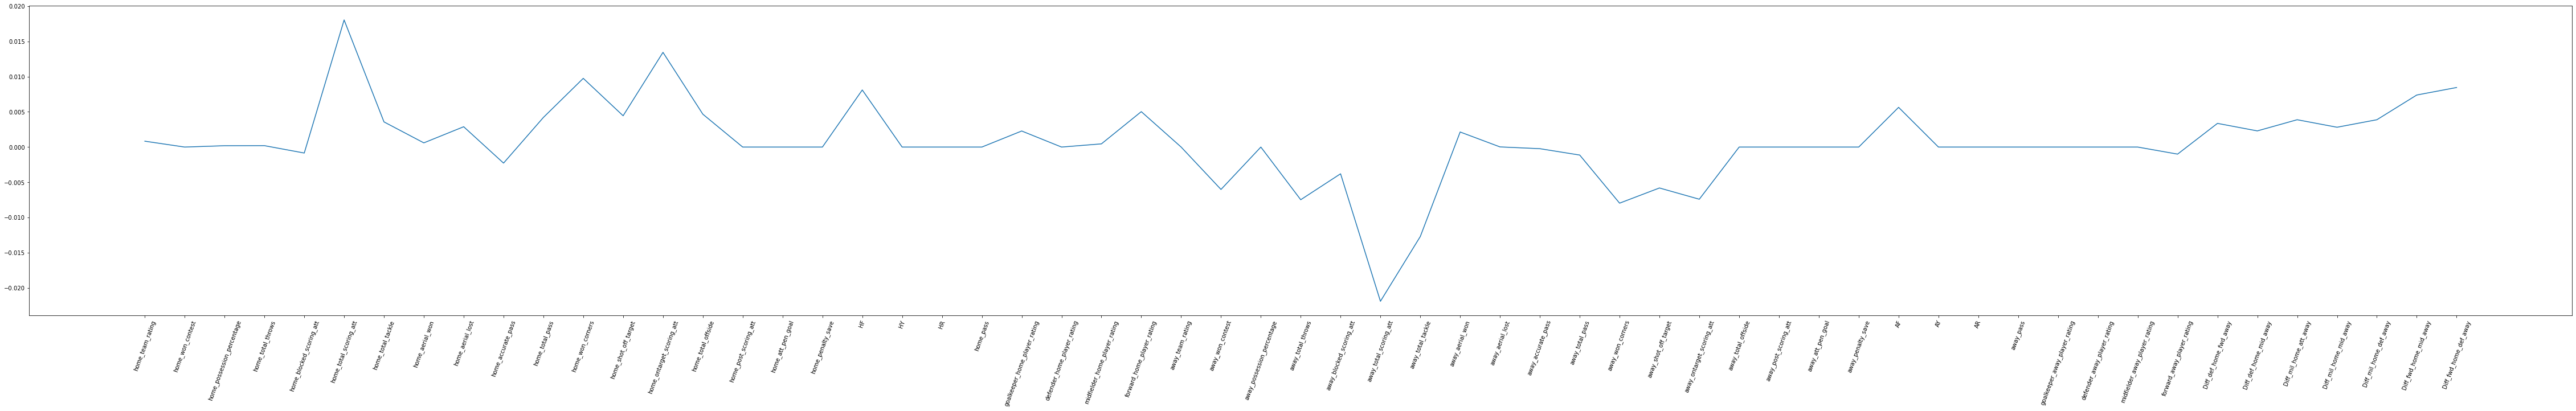

In [137]:
# QUID selection des variables via elasticnet ?
import matplotlib.pyplot as plt
elast_coef = optimal_clf.coef_
plt.figure(figsize=(80,10))
plt.plot(range(len(X_train.columns)), elast_coef[2,:])
plt.xticks(range(len(X_train.columns)), X_train.columns.values, rotation=70);

In [138]:
# Pourquoi optimal_clf.coef_ a trois colonnes & QUID LogisticRegression pour multiclasses ?

In [ ]:
# sklearn.linear_model.SGDClassifier

## 1.2 Séléction des variables pertinantes

In [ ]:
# Matrices Corr. / Résultats précédents / v. cours

## 1.3 Random Forest

## 1.4 SVM

## 1.5 K plus proches Voisins

##  1.6 Bagging